## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
# pip install imbalanced-learn

In [2]:
# pip install bayesian-optimization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import accuracy_score

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [4]:
data = pd.read_csv('./pitching.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [5]:
data.dropna(axis = 1, inplace=True) #axis=0은 행, axis = 1 열

In [6]:
data.shape

(44139, 18)

1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

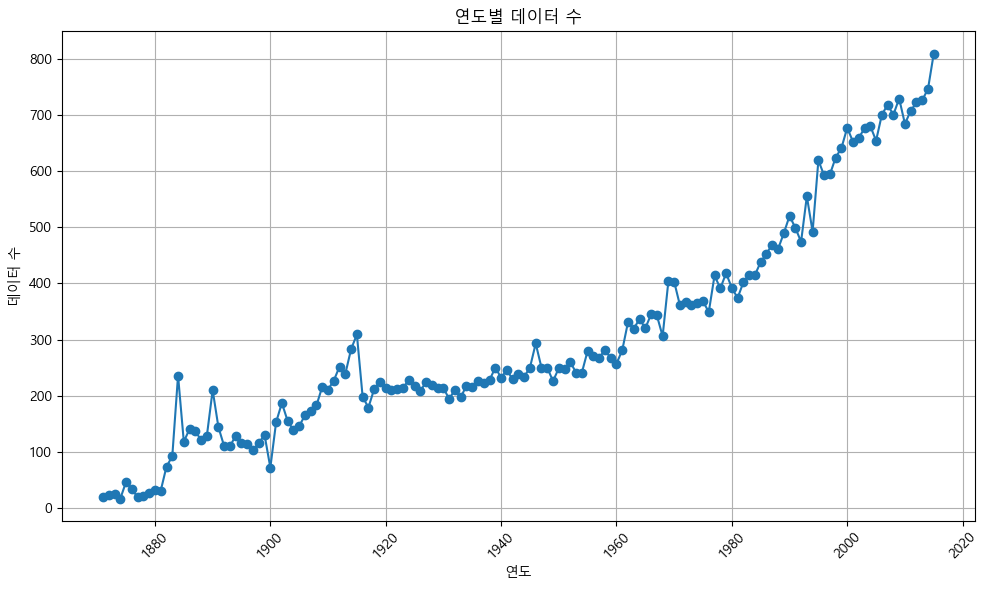

In [7]:
yearly_counts = data.groupby('year').size()

'''한글 글꼴'''
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('연도별 데이터 수')
plt.xlabel('연도')
plt.ylabel('데이터 수')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
data = data[data['year'] >= 1980]

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [9]:
data['year'].shape

(21157,)

In [10]:
data.head(20)

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
22987,anderri01,1980,1,SEA,0,0,5,2,0,0,0,8,4,1,10,7,0,5
22988,andujjo01,1980,1,HOU,3,8,35,14,0,0,2,132,53,8,43,75,0,59
22989,apontlu01,1980,1,BOS,0,0,4,0,0,0,0,6,1,0,2,1,0,1
22990,armstmi01,1980,1,SDN,0,0,11,0,0,0,0,16,9,3,13,14,0,10
22991,arroyfe01,1980,1,MIN,6,6,21,11,1,1,0,97,48,7,32,27,3,55


1.6 reset_index()를 통해 재배열하세요.

In [11]:
data = data.reset_index(drop= True)

In [12]:
data

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [13]:
data['w'].value_counts

<bound method IndexOpsMixin.value_counts of 0         8
1        12
2        14
3         0
4         7
         ..
21152    11
21153     0
21154    13
21155     0
21156     0
Name: w, Length: 21157, dtype: int64>

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [14]:
data = data[data['w'] != 0]

In [15]:
data.w.shape

(15303,)

1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [16]:
data['w'] = data['w'].apply(lambda x: 1 if x >= 10 else 0)

C:\Users\vivid\AppData\Local\Temp\ipykernel_3912\1332973382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['w'] = data['w'].apply(lambda x: 1 if x >= 10 else 0)


1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [17]:
data['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [18]:
data = data.drop(columns=['player_id', 'year', 'team_id'])

In [19]:
data.head(3)

,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,1,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120


In [20]:
data['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [21]:
## featur / target 분리 해야함
X = data.drop('w', axis=1)
y = data['w']

smote = SMOTE(sampling_strategy = 'auto', random_state = 123)
X_smote, y_smote = smote.fit_resample(X, y)

1.13 balance가 잘 맞춰졌는지 확인하세요.

In [22]:
print(f"원본 훈련 데이터 클래스 분포: \n{y.value_counts()}")
print(f"SMOTE 적용 후 클래스 분포: \n{pd.Series(y_smote).value_counts()}")

원본 훈련 데이터 클래스 분포: 
w
0    12589
1     2714
Name: count, dtype: int64
SMOTE 적용 후 클래스 분포: 
w
0    12589
1    12589
Name: count, dtype: int64


1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

## 작동방식
1. 소수 클래스 선택: 데이텃세에서 소수 클래스의 샘플 선택
2. knn 알고리즘 사용하여 가장 가까운 소수 클래스 샘플 찾음
3. 샘플 생성
4. 샘플 추가
5. 반복

## 장점
1. 클래스 불균형을 해결하여 모델의 성능 향상
2. 데이터를 제거하지 않아 정보 손실이 발생하지 않음

## 단점
1. 과적합 위험
2. 샘플 정확성에 대한 불확실

사실 머신러닝에서는 oversampling방법은 잘 사용하지 않고 undersampling 작업 많이 사용함. 데이터가 부족하면 oversampling 방법이 아니라 데이터를 추가로 수집함


1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

1. Borderline: 경계점의 데이터를 사용
2. ADASYN: 모든 소수 클래스에서 다수 클래스의 관측 비율을 계산(밀도 고려) SMOTE를 적용. 데이터가 더 큰 분산을 갖도록하기!

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123, stratify=y_train)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(9793, 14) (2449, 14) (3061, 14)
(9793,) (2449,) (3061,)


2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

분할함으로써 실제 세계의 데이터에 잘 일반화될 수 있도록 도와줌.

과적합을 방지하고, 하이퍼파라미터를 조절하여서 모델의 일반화 능력을 최대화하기 위함.

동일한 검증 세트를 통해서 여러 모델을 공저하게 비교하고 최적의 모델을 선택할 수 있음

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [24]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [25]:
rf = RandomForestClassifier()

scorer = make_scorer(accuracy_score)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, scoring=scorer)

random_search.fit(X_train, y_train)

print("최적의 하이퍼 파라미터: ", random_search.best_params_)
print("best accuracy: {:.4f}".format(random_search.best_score_))

최적의 하이퍼 파라미터:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
best accuracy: 0.9426


2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

1. n_estimators: 랜덤 포레스트 내의 결정 트리 개수. 많으면 모델 성능 향상되지만, 계산 비용이 증가하고 오버피팅 가능성 높음
2. max_depth: 트리의 최대 깊이. None일 경우 모든 리프 노드가 순수해질 때 까지, 모든 리프 노드에 최소 샘플 수를 충족할 때 까지 확장. max_depth를 제한함으로써 과적합 방지 가능
3. min_sample_split: 노드 분할하기 위한 최소 샘플 수. 이 값이 크면 트리의 성장 제한 됨. 너무 크면 패턴을 충분히 학습 못하고, 너무 작으면 과적합 위험성
4. min_sample_leaf: 리프 노드가 되기 위해 필요한 최소 샘플 수. 크면 클수록, 트리가 깊이 자라는 것 제한
5. boostrap: 부트스트램 샘플 사용 여부. true면 부트스트램 샘플 사용. false면 전체 데이터셋을 사용하셔 결정트리 학습. 트리가 다양성을 갖도록 도움. fasle시 모델의 분산 증가
6. criterion: 분할의 품질 측정. gini는 지니 불순도. entropy는 정보이득 의미. 

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [26]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [27]:
rf = RandomForestClassifier()
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer)
grid_search.fit(X_train, y_train)

print("최적의 하이퍼 파라미터: ", random_search.best_params_)
print("best accuracy: {:.4f}".format(random_search.best_score_))


최적의 하이퍼 파라미터:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
best accuracy: 0.9426


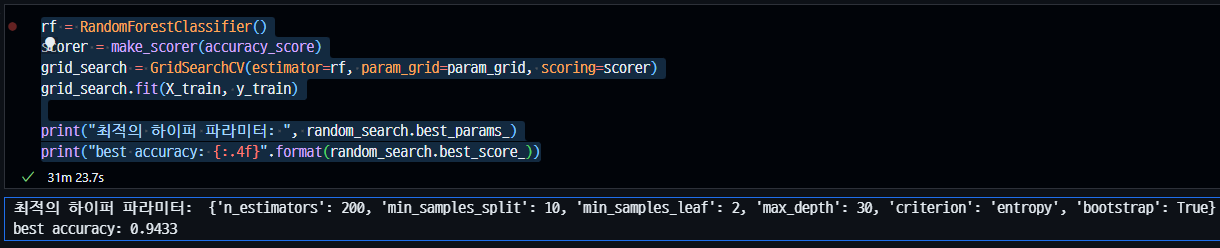

2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

## 주요 차이점은 하이퍼파타미터 공간을 탐색하는 방법이 다름
1. RandomizedSearchCV
- 주어진 하이퍼파리미터 공간 내에서 무작위로 하이퍼파타미터 조합을 선택하여 평가.

[장점]

- 계산 효율성: 모든 가능성 조합 대신 무작위로 선택된 조합 평가.
- 대규모 하이퍼파라미터 공간 탐색: 매우 큰 하이퍼파라미터 공간에서도 효율적으로 탐색 가능

[단점]
- 무작위 선택으로 인해 최적의 조합을 놓칠 수 있음

2. GridSearchCV
- 지정된 하이퍼파타미터 공간에 대해 모든 가능한 조합을 시도하여 평가

[장점]

- 완전성: 가능한 모든 하이퍼파라미터 조합ㅇ블 평가하기 때문에, 주어진 검색 공간 내에서 최적의 조합을 찾을 수 있음
- 간단함

[단점]
- 계산 비용: 가능한 모든 조합을 평가해야 하기 때문에, 하이퍼파라미터 공간이 크거나 모델 학습이 느릴 경우 시간이 오래 걸림
- 차원의 저주: 하이퍼 파라미터의 수가 많아질수록 필요한 조합의 수가 기하급수적으로 늘어남

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [28]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [29]:
# pip install scikit-optimize

In [30]:
# pip install importlib_metadata


In [31]:
from skopt import BayesSearchCV
rf = RandomForestClassifier()
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_grid)

bayes_search.fit(X_train, y_train)

print("최적의 하이퍼파라미터: ", bayes_search.best_params_)
print("best accuracy: {:.4f}".format(bayes_search.best_score_))

최적의 하이퍼파라미터:  OrderedDict([('bootstrap', True), ('criterion', 'entropy'), ('max_depth', 10), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 200)])
best accuracy: 0.9430


2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [37]:
random_param = random_search.best_estimator_
grid_param = grid_search.best_estimator_
bayes_param = bayes_search.best_estimator_

In [38]:
best_random = random_search.predict(X_test)
best_grid = grid_search.predict(X_test)
best_bayes = bayes_search.predict(X_test)

In [39]:
print(f"random_search: {accuracy_score(y_test, best_random)}")
print(f"grid_search: {accuracy_score(y_test, best_grid)}")
print(f"bayes_search: {accuracy_score(y_test, best_bayes)}")

random_search: 0.9376020908199935
grid_search: 0.9372754001960144
bayes_search: 0.9362953283240771


### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.

In [35]:
# pip install optuna

In [36]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 300)
    max_depth = trial.suggest_int('max_depth', 1, 35, log=True)

    #랜덤포레스트 분류기 정의
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=123)
    score = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
    return score

# optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-04-08 09:35:28,942] A new study created in memory with name: no-name-2566bc01-ac13-4f0e-a7e7-965defc1ef79
[I 2024-04-08 09:35:35,840] Trial 0 finished with value: 0.9398554952626912 and parameters: {'n_estimators': 273, 'max_depth': 6}. Best is trial 0 with value: 0.9398554952626912.
[I 2024-04-08 09:35:37,015] Trial 1 finished with value: 0.9398547652827812 and parameters: {'n_estimators': 25, 'max_depth': 24}. Best is trial 0 with value: 0.9398554952626912.
[I 2024-04-08 09:35:38,891] Trial 2 finished with value: 0.92719347231108 and parameters: {'n_estimators': 190, 'max_depth': 1}. Best is trial 0 with value: 0.9398554952626912.
[I 2024-04-08 09:35:40,580] Trial 3 finished with value: 0.9279083312085703 and parameters: {'n_estimators': 170, 'max_depth': 1}. Best is trial 0 with value: 0.9398554952626912.
[I 2024-04-08 09:35:41,065] Trial 4 finished with value: 0.9339325425565252 and parameters: {'n_estimators': 31, 'max_depth': 3}. Best is trial 0 with value: 0.939855495262

## 최적의 파라미터
[I 2024-04-08 09:41:57,544] Trial 42 finished with value: 0.9432247696783032 and parameters: {'n_estimators': 283, 'max_depth': 28}. Best is trial 42 with 

value: 0.9432247696783032.

random_search: 0.9376020908199935

grid_search: 0.9372754001960144

bayes_search: 0.9362953283240771

## optuna가 제일 좋음!
0.9432247696783032.